# Project: Investigate a Dataset - [TMDb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Research Questions
1. Which movie had the highest and lowest budget?
2. Which movie had the highest and lowest revenue?
3. Which movie had the longest and shortest runtime?
4. What are the 10 most popular movies?
5. Who are the 10 most famous directors?
6. Does runtime affect votes?
7. Popularity Trending Over Time .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> `release_date` column should be in date format. 

### Data Assessing

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>There is missing values in **[cast, homepage, director, tagline, keywords, overview, genres, production_companies ]**

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

>There is some columns aren't useful for analysis like :<br> **[imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, tagline]** <br><br>


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.duplicated().sum()

1

> There is one duplicated row 


## Data Cleaning
### Remove columns not useful for analysis using `drop` function .


In [8]:
df.drop(['imdb_id', 'budget_adj','revenue_adj','homepage','keywords','overview','production_companies','tagline'],1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### Change `release_date` column into date format using `to_datetime` function.

In [9]:
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


In [10]:
# Changing 0 values into null 
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

# Removing null values
df.dropna(axis=0, inplace=True) 

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 13 columns):
id                3850 non-null int64
popularity        3850 non-null float64
budget            3850 non-null float64
revenue           3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null float64
genres            3850 non-null object
release_date      3850 non-null datetime64[ns]
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 421.1+ KB


### Remove duplicate rows.

In [12]:
df.drop_duplicates(keep = 'first', inplace= True)

In [13]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (which movies had the highest and lowest budgets?)

In [14]:
# Creat a function to find out the highest and lowest
def find(column):
    highest = df[column].idxmax()
    highest_info = pd.DataFrame(df.loc[highest])
    
    lowest = df[column].idxmin()
    lowest_info = pd.DataFrame(df.loc[lowest])
    
    info = pd.concat([highest_info, lowest_info], axis=1)
    
    return info

In [15]:
# Finding out highest and lowest budgets
find('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


>* The highest budget movie is : **The Warrior's Way** <br><br>
>* The lowest budget movie is : **Lost & Found**

### Research Question 2  (which movies had the highest and lowest revenues?)

In [16]:
# Finding out highest and lowest revenues
find('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


>* The highest revenue movie is : **Avatar** <br> <br>
>* The lowest revenue movie is : **Shattered Glass**

### Research Question 3 (which movies had the longest and shortest runtime?)

In [17]:
# Finding out longest and shortest runtime
find('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


>* The longest runtime movie is : **carlos** <br> <br>
>* The shortest runtime movie is : **kid's story**

### Research Question 4 (What are the 10 most popular movies?)

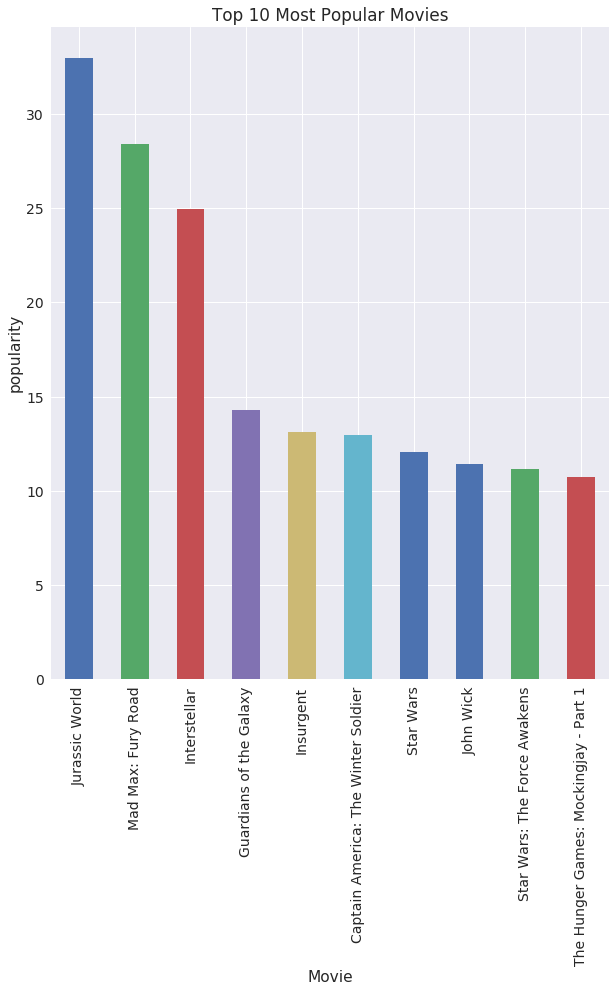

In [19]:
# Creaating a bar plot showing the the 10 most popular movies .
df.groupby('original_title').popularity.max().sort_values(ascending=False)[0:10].plot(kind='bar');
sns.set(rc={'figure.figsize' : (10,12)}, font_scale=1.4)

# Add title and axis names .
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Movie')
plt.ylabel('popularity') ;

> As shown in the graphical visualization, the first movie in terms of popularity is : **Jurassic World** <br>
And the tenth movie in terms of popularity is : **The Hunger games : mockingjay-Part 1**

### Research Question 5 (Who are the 10 most famous directors?)

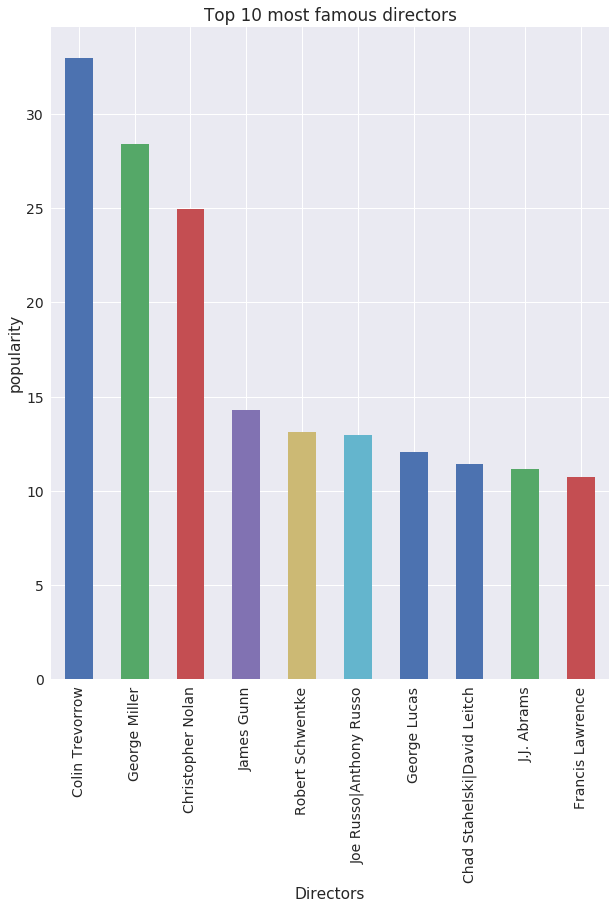

In [20]:
# Creaating a bar plot showing the the 10 most popular movies .
df.groupby('director').popularity.max().sort_values(ascending=False)[0:10].plot(kind='bar');
sns.set(rc={'figure.figsize' : (10,12)}, font_scale=1.4)

# Add title and axis names .
plt.title('Top 10 most famous directors')
plt.xlabel('Directors')
plt.ylabel('popularity') ;

> As shown in the bar plot , the first director in terms of popularity is : **Colin Tervorrow** . <br> 
And the tenth director in terms of popularity is : **Francis Lawrence**

### Research Question 6 (Does runtime affect votes?)

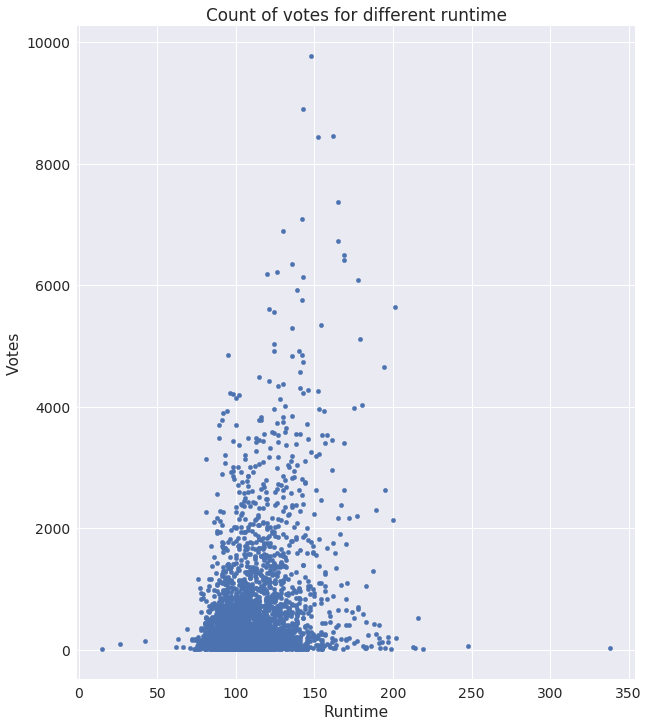

In [21]:
# Creaating a scatter plot showing the count of votes for different runtime .
df.plot.scatter('runtime','vote_count');
sns.set(rc={'figure.figsize' : (10,12)}, font_scale=1.4)

# Add title and axis names . 
plt.title('Count of votes for different runtime')
plt.xlabel('Runtime')
plt.ylabel('Votes') ;

> The scatter plot showed that high runtime movies has very low vote counts, while normal runtime movies had a variation in vote counts.

### Research Question 7 (Popularity Trending Over Time)

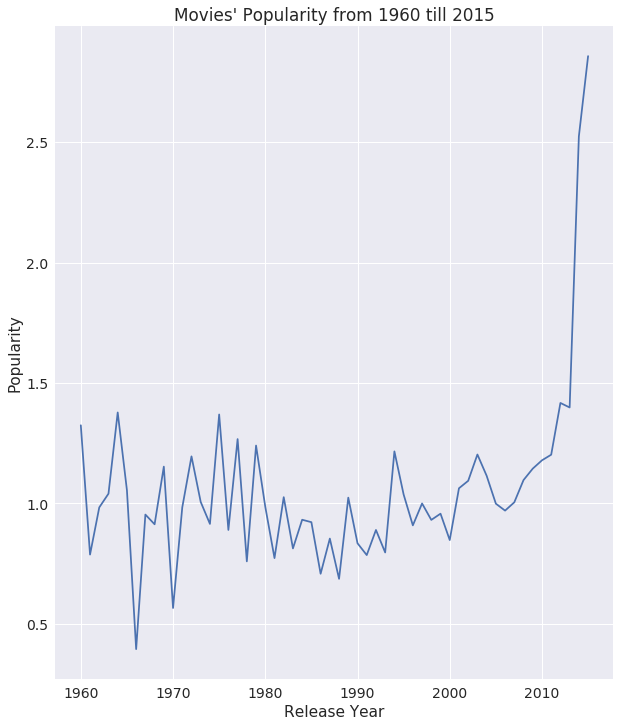

In [22]:
# Creaating a plot showing the count of votes for different runtime .
mean=df.groupby('release_year')['popularity'].mean().plot()
sns.set(rc={'figure.figsize' : (10,12)}, font_scale=1.4)

# Add title and axis names .
plt.title('Movies\' Popularity from 1960 till 2015')
plt.xlabel('Release Year')
plt.ylabel('Popularity') ;

> Movies Popularity started increasing greatly since 2010.

<a id='conclusions'></a>
## Conclusions
The exploratory data anaylsis has shown the result of some investigations on movies budgets  revenues, runtime, as well as the top 10 movies with Jurassic World being the top movie of all time.
Also, as shown, the most famous director was Colin Tervorrow, High runtime movies had a very low sound count, while normal runtime movies had a very low sound count, Movies Popularity started increasing greatly since 2010.<br> <br>
### Limitations
* Several entries had been removed due to missing data.
* Some columns with several entries where hard to analyze.


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0